Участник 4 - Подготовка данных

Цель :
- Заполнить пропущенные значения в данных, минимизировав потенциальное искажение информации и сохранив целостность датасета.
- Преобразовать категориальные текстовые признаки  в числовой формат, понятный для алгоритмов машинного обучения, без создания ложной порядковой зависимости.
- Привести числовые признаки к единому масштабу, чтобы признаки с большим разбросом значений не доминировали над признаками с меньшим разбросом при работе алгоритмов, основанных на расстояниях или градиенте

Библиотеки

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

Работа с пропусками

In [25]:
df = pd.read_csv("../data/interim/diabetes_stage1.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [26]:
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Анализ пропущенных значений. Метод isnull().sum() подсчитывает количество NaN в каждом столбце. Это помогает оценить масштаб проблемы и определить, какие столбцы требуют особого внимания.

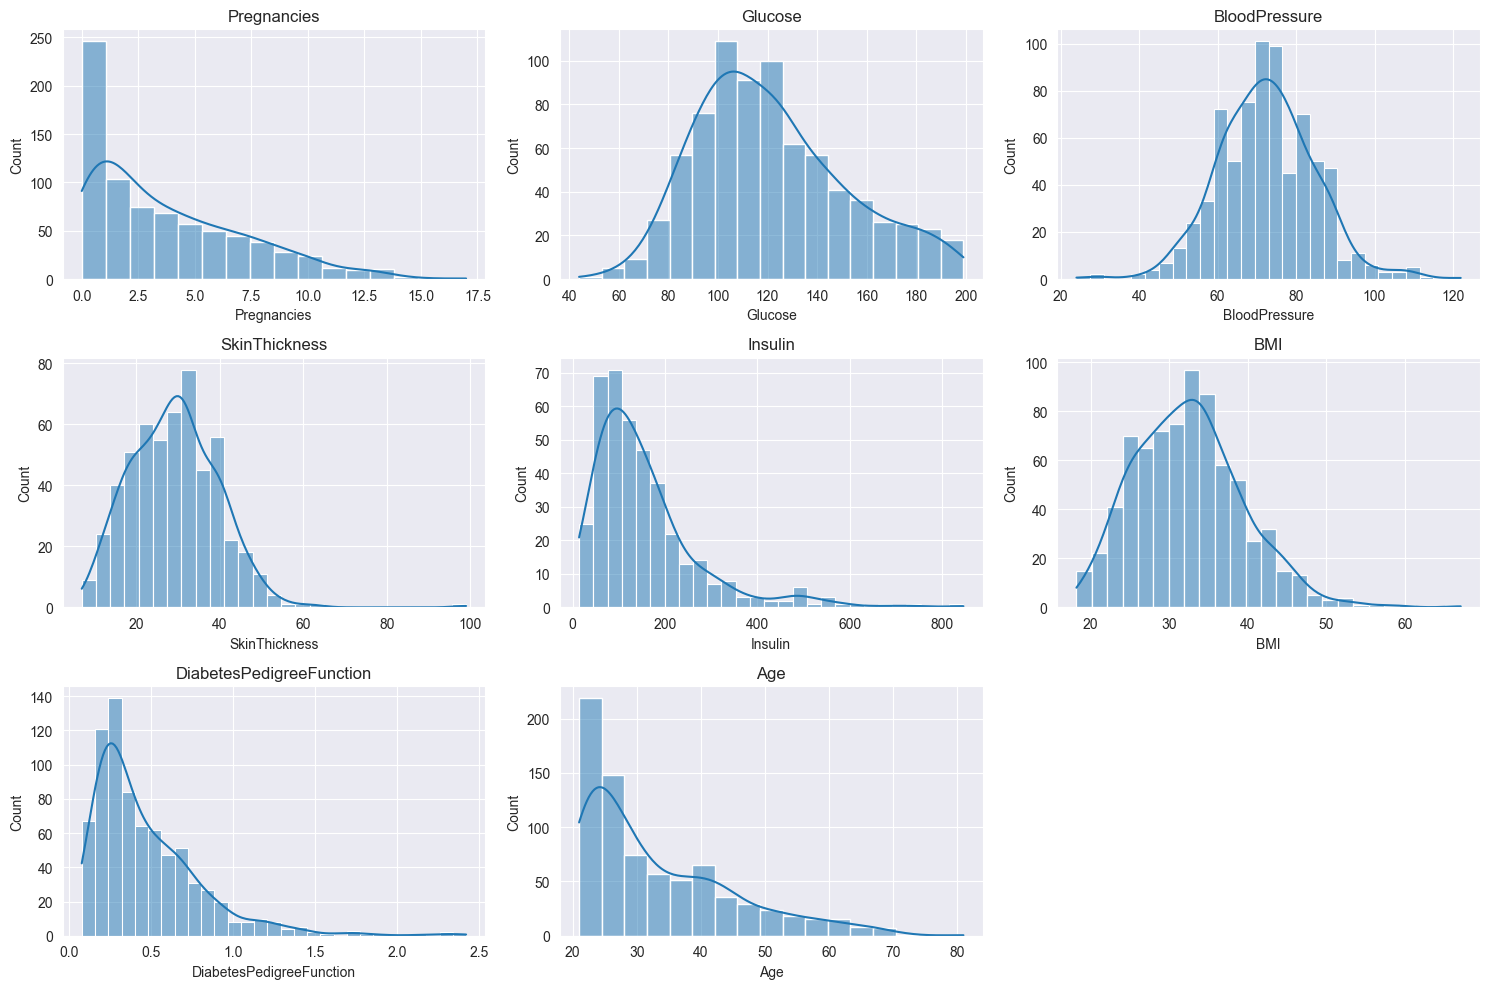

In [27]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Нас интересую только: SkinThickness 227 пропусков ( имеет относительно нормальное распределние с выбросами на конце, возьмем медиану) Insulin 374 пропуска.(у инсулина много значений близких к нулю, так и далеко за 400, возьмем так же медиану) у остальных очень мало пропусков их можно заполнить просто средним.

In [28]:
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

Практическая реализация заполнения пропусков:

SkinThickness и Insulin - заполняются медианой из-за наличия выбросов

Glucose, BloodPressure и BMI - заполняются средним значением, так как имеют нормальное распределение

Категориальных признаков нет


Нормализация

MinMaxScaler выбран потому, что важно сохранить исходные пропорции между значениями признаков, в отличие от стандартизации, которая меняет распределение.

In [17]:
X = df.drop('Outcome', axis = 1)
y = df.Outcome

col = X.columns

In [18]:
scaler = MinMaxScaler()
scaler.fit(X)
df_x = pd.DataFrame(scaler.transform(X), columns = col)
df_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333


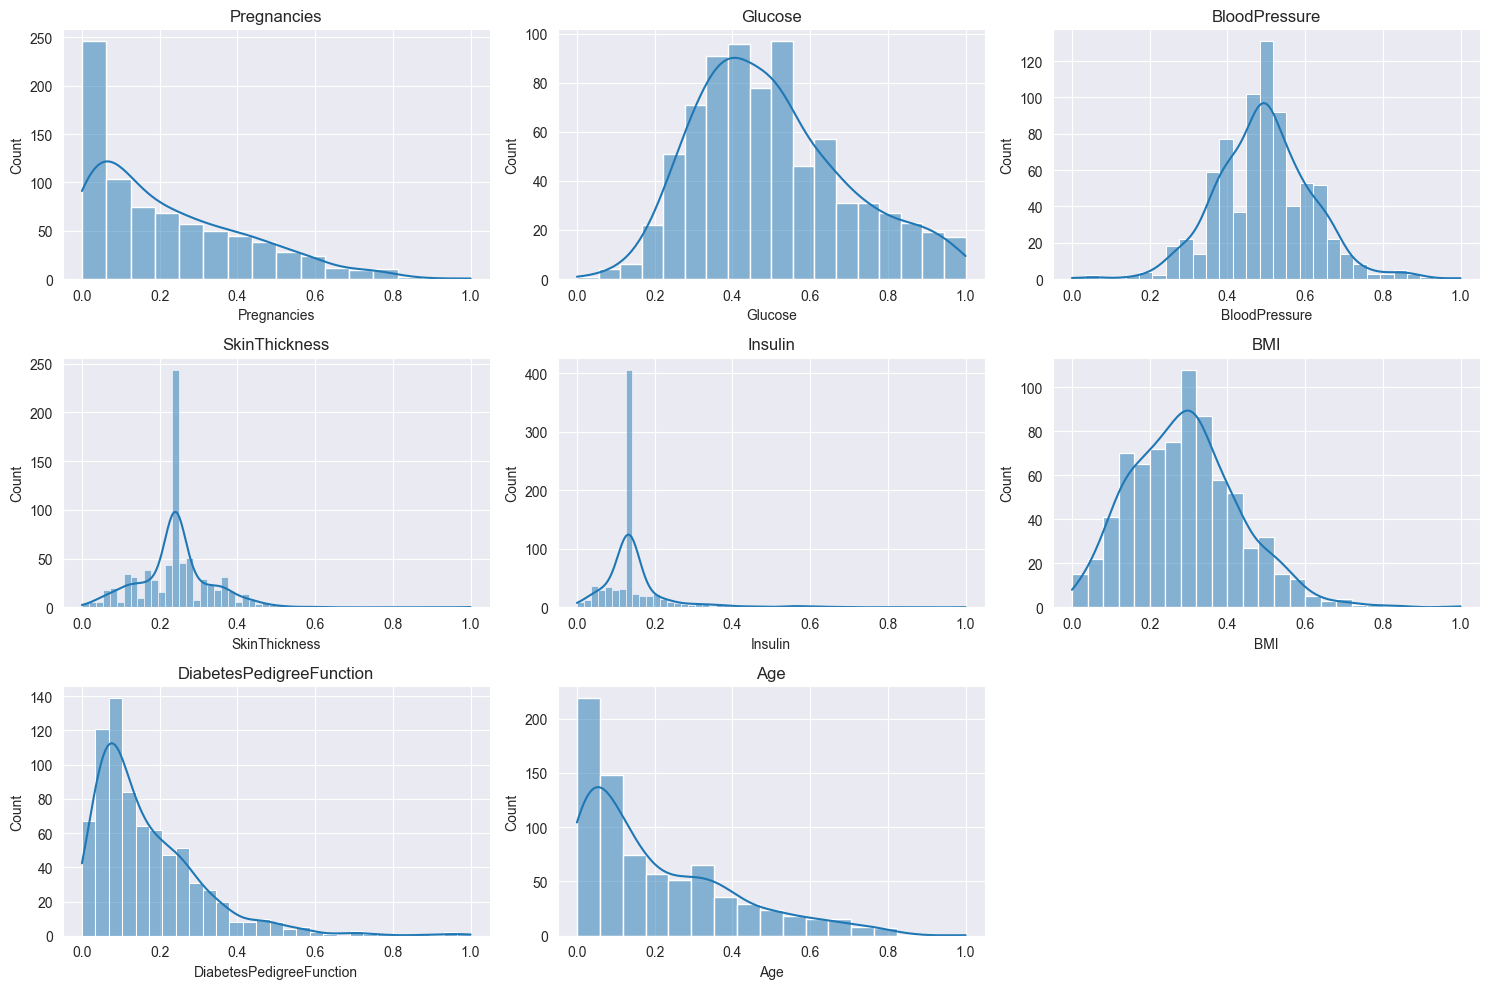

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_x.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_x[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Визуальная проверка результатов нормализации. Убеждаемся, что:

Все значения в диапазоне [0, 1]

Формы распределений сохранены

Нет искажений данных



In [29]:
df_clean = df_x.copy()
df_clean['Outcome'] = y

# Запись полного датасета
df_clean.to_csv('../data/interim/diabetes_stage4.csv', index=False)

Создание финального датафрейма с нормализованными признаками и исходной целевой переменной. Сохранение данных для следующих этапов анализа.



Итоговые выводы участника 4 : 

Данные успешно прошли полный цикл предобработки и готовы для следующих этапов анализа и построения прогнозных моделей. Качество обработки обеспечивает надежную основу для получения точных и интерпретируемых результатов.